In [4]:
#cd SF_plotting/

import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('Sample_4_Stars_blue_314248_lines.txt')

xi = data[:,0]
ei = data[:,1]
n = data[:,2]
rmag = data[:,3]

data1 = np.genfromtxt('Sample_starB_tau_0-1.7_204242_lines_1270_objects.txt')

xi1 = data1[:,0]
ei1= data1[:,1]
tau = data1[:,2]
n1 = data1[:,3]
rmag1 = data1[:,4]


How many of the new sample ( 17 - 19  ) stars was in the old sample ( 0- 20 ) ? 

In [5]:
np.sum(np.in1d(n1,n))

29843

In [6]:
len(n1)

204242

In [7]:
len(n)

314248

So the overlap is about 10%....  Check whether the same points are present for those stars which were selected ? 

In [11]:
star = n1[np.in1d(n1,n)][0]

In [14]:
# Make filters to pick out the right lines
m = n == star
m1 = n1 == star

(array([  3.,   1.,   8.,  30.,  48.,  55.,  19.,   4.,   7.,   5.]),
 array([-0.5573 , -0.44057, -0.32384, -0.20711, -0.09038,  0.02635,
         0.14308,  0.25981,  0.37654,  0.49327,  0.61   ]),
 <a list of 10 Patch objects>)

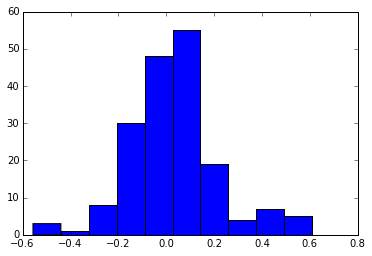

In [18]:
%matplotlib inline 
plt.hist(xi[m])

(array([  3.,   1.,   8.,  30.,  48.,  54.,  19.,   4.,   7.,   5.]),
 array([-0.5573 , -0.44057, -0.32384, -0.20711, -0.09038,  0.02635,
         0.14308,  0.25981,  0.37654,  0.49327,  0.61   ]),
 <a list of 10 Patch objects>)

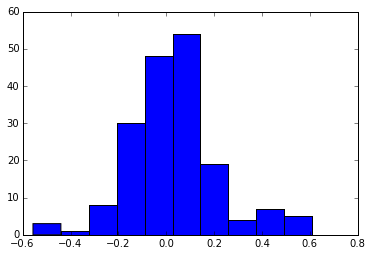

In [19]:
plt.hist(xi1[m1])

In [20]:
len(xi[m])

180

In [22]:
len(xi1[m1])

179

In [25]:
# Check : all numbers in one are identical as in the other
np.sum(np.in1d(xi1[m1],xi[m])) == len(xi1[m1])

True

In [28]:
# What is the one datapoint that isn't ? 
xi[m][~np.in1d(xi[m], xi1[m1])]

array([ 0.1008])

That's very much an outlier! It's surprising because I see no reason why it should be here and it wasn't there before.  
Check  errors now : 

(array([ 11.,  40.,  59.,  29.,  11.,  11.,   9.,   4.,   4.,   2.]),
 array([ 0.08445176,  0.08833852,  0.09222527,  0.09611202,  0.09999878,
         0.10388553,  0.10777229,  0.11165904,  0.11554579,  0.11943255,
         0.1233193 ]),
 <a list of 10 Patch objects>)

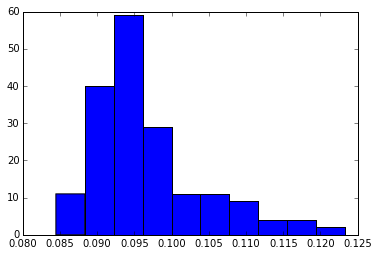

In [29]:
plt.hist(ei[m])

(array([ 11.,  40.,  59.,  28.,  11.,  11.,   9.,   4.,   4.,   2.]),
 array([ 0.08445176,  0.08833852,  0.09222527,  0.09611202,  0.09999878,
         0.10388553,  0.10777229,  0.11165904,  0.11554579,  0.11943255,
         0.1233193 ]),
 <a list of 10 Patch objects>)

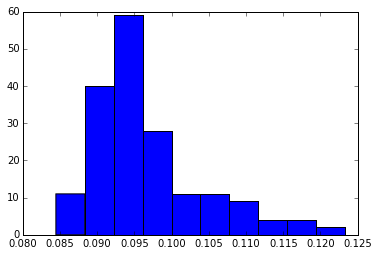

In [30]:
plt.hist(ei1[m1])

In [31]:
# Check : all numbers in one are identical as in the other
np.sum(np.in1d(ei1[m1],ei[m])) == len(ei1[m1])

True

In [32]:
# What is the one datapoint that isn't ? 
ei[m][~np.in1d(ei[m], ei1[m1])]

array([ 0.09672874])

A rather insignificant point... 

Perform this analysis for more stars : plot the overall new histogram. 

First make the mag cut 17-18



In [40]:
# mask the new dataset 
msk_mag = (rmag1 < 18) * (rmag1 > 17)
msk_err = ei1 < 0.3 

msk1 = msk_mag * msk_err

# mask the old dataset 
msk_mag = (rmag < 18) * (rmag > 17)
msk_err = ei < 0.3 

msk = msk_mag * msk_err

(array([  8127.,  47428.,  28326.,   9644.,   2220.,    784.,    417.,
           257.,    135.,     90.]),
 array([ 0.03401191,  0.06054633,  0.08708076,  0.11361518,  0.1401496 ,
         0.16668403,  0.19321845,  0.21975287,  0.2462873 ,  0.27282172,
         0.29935614]),
 <a list of 10 Patch objects>)

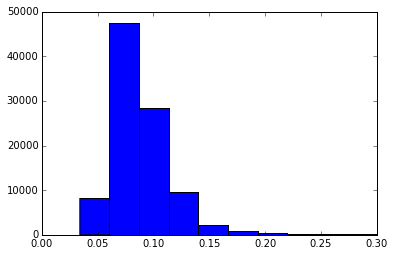

In [41]:
plt.hist(ei1[msk1])

(array([  2.34900000e+03,   3.22830000e+04,   2.23800000e+04,
          2.82000000e+03,   1.15100000e+03,   7.38000000e+02,
          3.74000000e+02,   1.15000000e+02,   3.50000000e+01,
          1.20000000e+01]),
 array([ 0.03267109,  0.04699825,  0.06132541,  0.07565258,  0.08997974,
         0.1043069 ,  0.11863407,  0.13296123,  0.14728839,  0.16161555,
         0.17594272]),
 <a list of 10 Patch objects>)

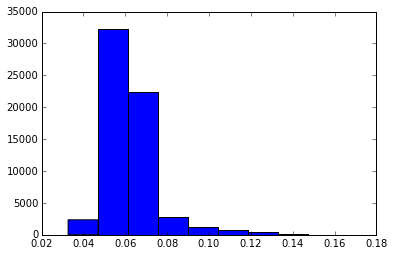

In [42]:
plt.hist(ei[msk])

They are clearly different, despite selecting the magnitudes! 

Check what objects are overlapping... 

In [48]:
len(np.unique(n1[msk1][np.in1d(n1[msk1],n[msk])]))

15

In [51]:
# Loop over all stars that are in both samples and check whether xi, ei are the same... If not, report xi, ei 

len(np.unique(n1[np.in1d(n1,n)]))

175

In [90]:
diff = []
n_diff = []
c = 0
unmatch = {}

for star in np.unique(n1[np.in1d(n1,n)]) :
    m = n == star
    m1 = n1 == star
    if len(xi1[m1]) == len(xi[m]) : 
        matchdiff = np.sum(np.in1d(xi1[m1],xi[m])) - len(xi1[m1])
        if matchdiff != 0 :
            unmatch[star] = [matchdiff]
                             
    else:
        c += 1 
        diff.append(len(xi1[m1]) -len(xi[m]))
        n_diff.append(star)
    

In [91]:
unmatch

{}

(array([ 40.,   9.,   4.,   9.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 5 Patch objects>)

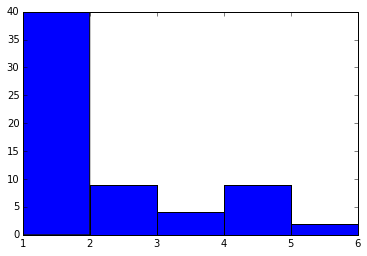

In [68]:
plt.hist(abs(np.array(diff)), bins=5)

In [69]:
c

64

In [70]:
len(np.unique(n1[np.in1d(n1,n)]))

175

(array([  5.,   4.,  12.,   9.,   5.,   9.,   5.,   4.,   6.,   3.]),
 array([ 17.437 ,  17.6498,  17.8626,  18.0754,  18.2882,  18.501 ,
         18.7138,  18.9266,  19.1394,  19.3522,  19.565 ]),
 <a list of 10 Patch objects>)

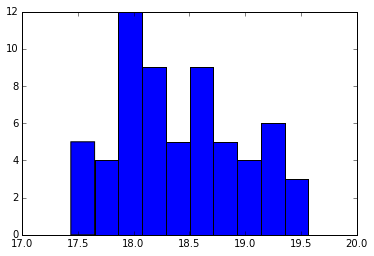

In [79]:
# magnitude histogram for those stars that differ...
plt.hist(np.unique(rmag[np.in1d(n, n_diff)]))

In [81]:
match

{11190.0: 0,
 17827.0: 0,
 37069.0: 0,
 41843.0: 0,
 54775.0: 0,
 70471.0: 0,
 91078.0: 0,
 94158.0: 0,
 95878.0: 0,
 96880.0: 0,
 102027.0: 0,
 104450.0: 0,
 153358.0: 0,
 180617.0: 0,
 197700.0: 0,
 198970.0: 0,
 212252.0: 0,
 215878.0: 0,
 249314.0: 0,
 253308.0: 0,
 257598.0: 0,
 329634.0: 0,
 358921.0: 0,
 359139.0: 0,
 360681.0: 0,
 372489.0: 0,
 378260.0: 1,
 385554.0: 0,
 388778.0: 0,
 396929.0: 1,
 408637.0: 0,
 418049.0: 0,
 433128.0: 0,
 439371.0: 0,
 446353.0: 0,
 453686.0: 0,
 453861.0: 0,
 460961.0: 0,
 465561.0: 0,
 468182.0: 0,
 473120.0: 0,
 473683.0: 0,
 480043.0: 0,
 482463.0: 0,
 483852.0: 0,
 484968.0: 0,
 493041.0: 0,
 496759.0: 0,
 512000.0: 0,
 518540.0: 0,
 523102.0: 0,
 523894.0: 0,
 532659.0: 0,
 534171.0: 0,
 545865.0: 0,
 546304.0: 0,
 548906.0: 0,
 556750.0: 0,
 560922.0: 0,
 562492.0: 0,
 565276.0: 0,
 566501.0: 0,
 572828.0: 0,
 573950.0: 0,
 578430.0: 0,
 579353.0: 0,
 584927.0: 0,
 591568.0: 0,
 598004.0: 0,
 604964.0: 0,
 614402.0: 0,
 615855.0: 0,
 6

In [74]:
n_diff

[45739.0,
 67489.0,
 144164.0,
 164270.0,
 241658.0,
 273089.0,
 282497.0,
 290281.0,
 293148.0,
 299021.0,
 302132.0,
 305317.0,
 306981.0,
 327810.0,
 367163.0,
 606175.0,
 611273.0,
 621516.0,
 622069.0,
 634085.0,
 655898.0,
 665585.0,
 675425.0,
 676995.0,
 710954.0,
 743449.0,
 759551.0,
 817422.0,
 833375.0,
 846618.0,
 852090.0,
 852371.0,
 858958.0,
 867535.0,
 869529.0,
 870706.0,
 871105.0,
 889280.0,
 900005.0,
 902049.0,
 905368.0,
 910703.0,
 918730.0,
 926778.0,
 927191.0,
 927684.0,
 932723.0,
 934557.0,
 938040.0,
 951870.0,
 952715.0,
 962149.0,
 962342.0,
 962859.0,
 967230.0,
 973451.0,
 973704.0,
 976101.0,
 976329.0,
 976967.0,
 977247.0,
 981140.0,
 985622.0,
 994014.0]

In [75]:
np.in1d(n, n_diff)

array([ True,  True,  True, ..., False, False, False], dtype=bool)